In [2]:
import models
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Model One

In [3]:
df = pd.read_excel("model_one_results.xlsx", sheet_name="Sheet2", skiprows=2)
df

,rand_seed,num_vertices,prob_base_num,avg_deg
0,13,20,19.5,5.200000
1,47,20,28.0,5.200000
2,50,20,29.0,5.200000
3,13,30,90.0,5.200000
4,47,30,150.0,5.266667
5,50,30,75.0,5.200000
6,13,40,240.0,5.250000
7,47,40,400.0,5.200000
8,47,40,420.0,5.200000
9,50,40,120.0,5.250000


In [4]:
# Check if planar and connected
planar = []
connected = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    base = int(row["prob_base_num"])
    G = models.model_one(n, rs, base)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

model_one_df = df.assign(planar=planar, connected=connected)

In [5]:
model_one_df

,rand_seed,num_vertices,prob_base_num,avg_deg,planar,connected
0,13,20,19.5,5.200000,False,True
1,47,20,28.0,5.200000,False,True
2,50,20,29.0,5.200000,False,True
3,13,30,90.0,5.200000,False,True
4,47,30,150.0,5.266667,False,False
5,50,30,75.0,5.200000,False,True
6,13,40,240.0,5.250000,False,True
7,47,40,400.0,5.200000,False,False
8,47,40,420.0,5.200000,False,False
9,50,40,120.0,5.250000,False,True


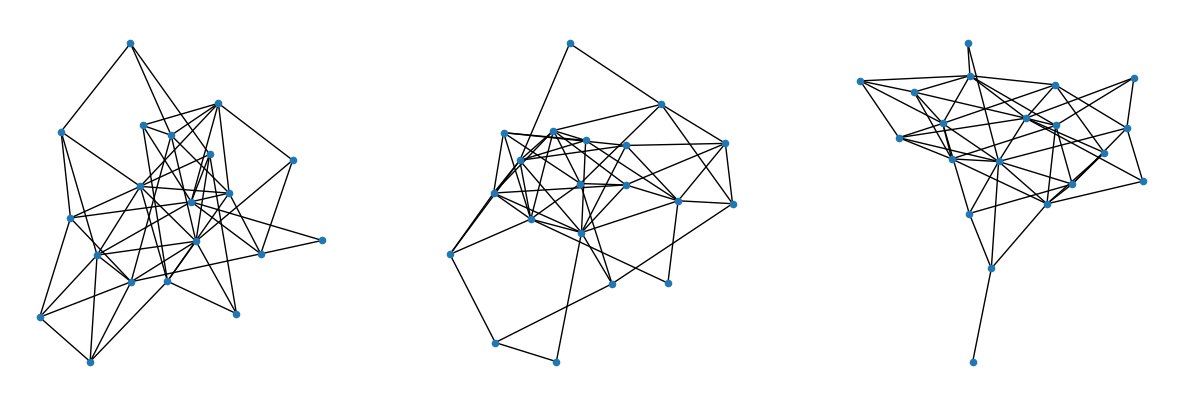

In [6]:
# Create graphs with 20 vertices
G1 = models.model_one(20, 13, 19.5)
G2 = models.model_one(20, 47, 28)
G3 = models.model_one(20, 50, 29)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

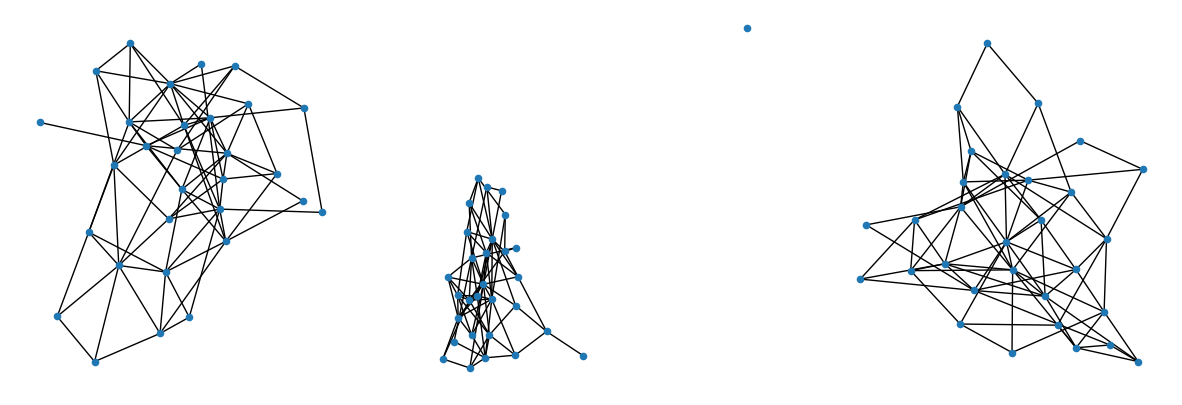

In [7]:
# Create graphs with 30 vertices
G1 = models.model_one(30, 13, 90)
G2 = models.model_one(30, 47, 150)
G3 = models.model_one(30, 50, 75)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

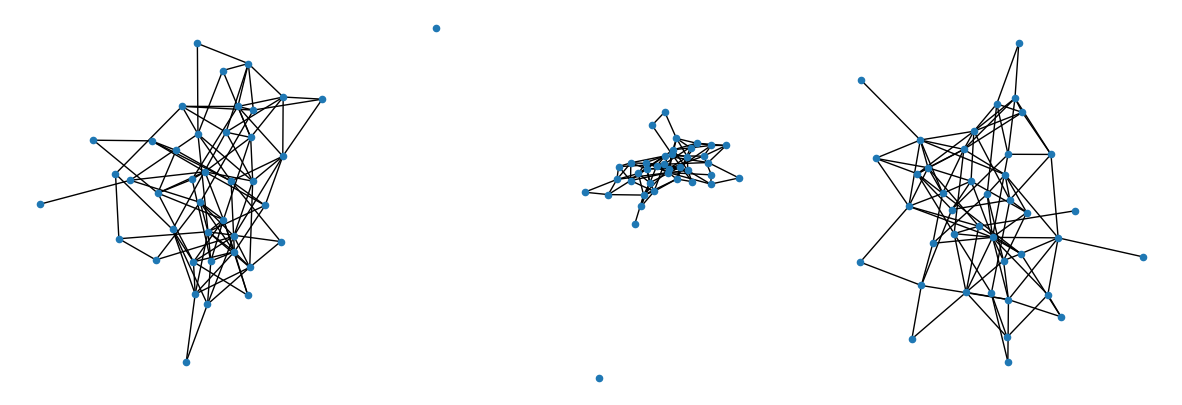

In [8]:
# Create graphs with 40 vertices
G1 = models.model_one(40, 13, 240)
G2 = models.model_one(40, 47, 400)
G3 = models.model_one(40, 50, 120)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

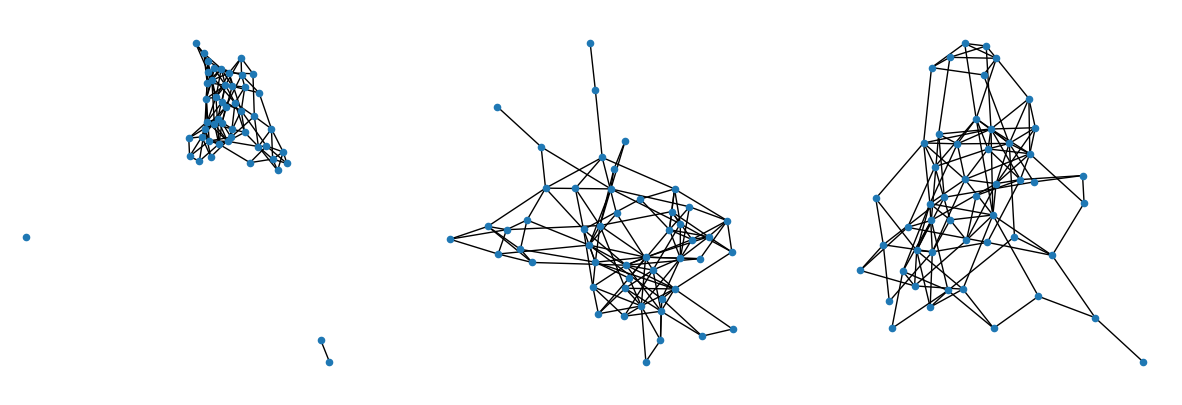

In [9]:
# Create graphs with 50 vertices
G1 = models.model_one(50, 13, 750)
G2 = models.model_one(50, 47, 420)
G3 = models.model_one(50, 50, 470)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: Graphs are not planar, but most are connected although some aren't.

# Model Two

In [10]:
new_df = df[["num_vertices", "rand_seed"]].drop_duplicates()

# Check if planar and connected
planar = []
connected = []

for index, row in new_df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_two(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

model_two_df = new_df.assign(planar=planar, connected=connected)

In [11]:
model_two_df

,num_vertices,rand_seed,planar,connected
0,20,13,False,True
1,20,47,False,True
2,20,50,False,True
3,30,13,False,True
4,30,47,False,True
5,30,50,False,True
6,40,13,False,True
7,40,47,False,True
9,40,50,False,True
10,50,13,False,True


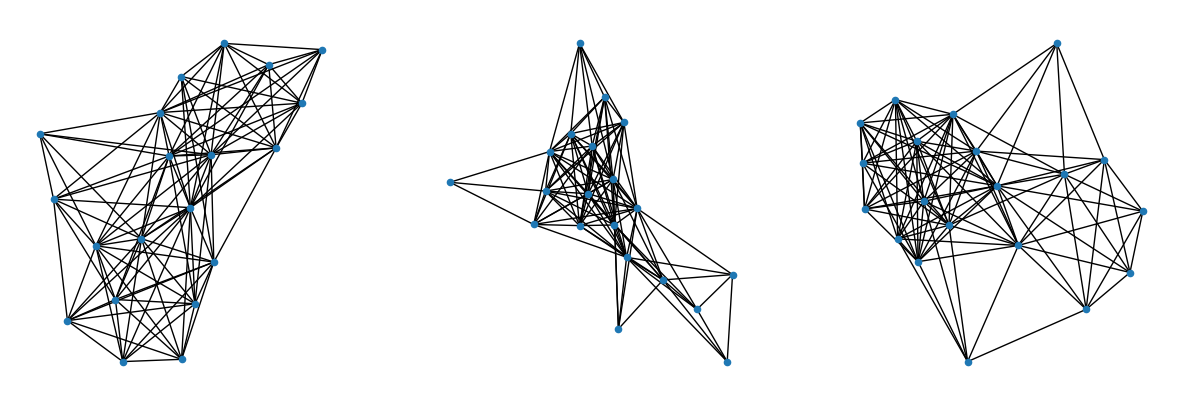

In [12]:
# Create graphs with 20 vertices
G1 = models.model_two(20, 13)
G2 = models.model_two(20, 47)
G3 = models.model_two(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

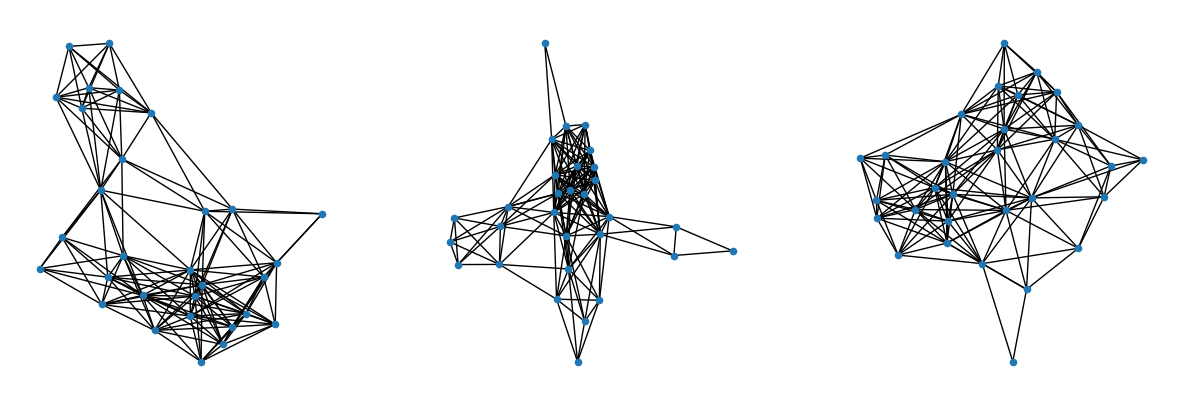

In [13]:
# Create graphs with 30 vertices
G1 = models.model_two(30, 13)
G2 = models.model_two(30, 47)
G3 = models.model_two(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

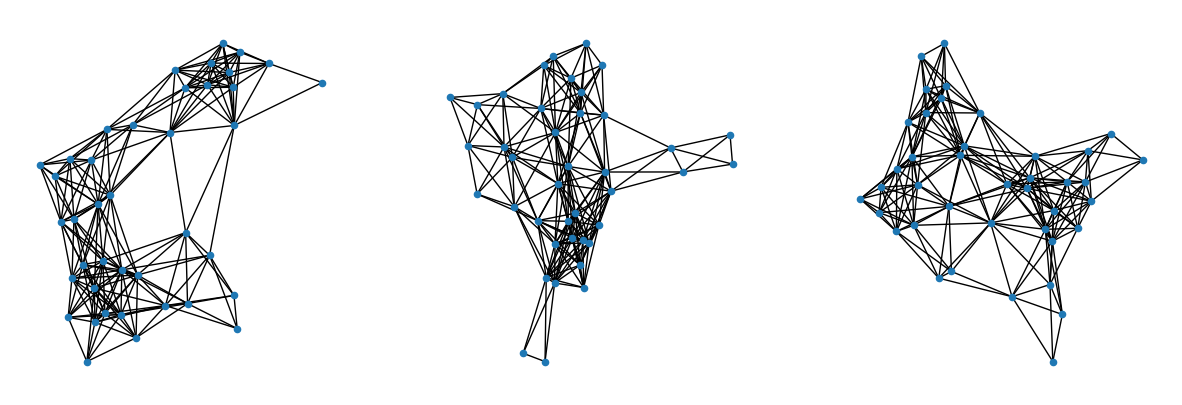

In [14]:
# Create graphs with 40 vertices
G1 = models.model_two(40, 13)
G2 = models.model_two(40, 47)
G3 = models.model_two(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

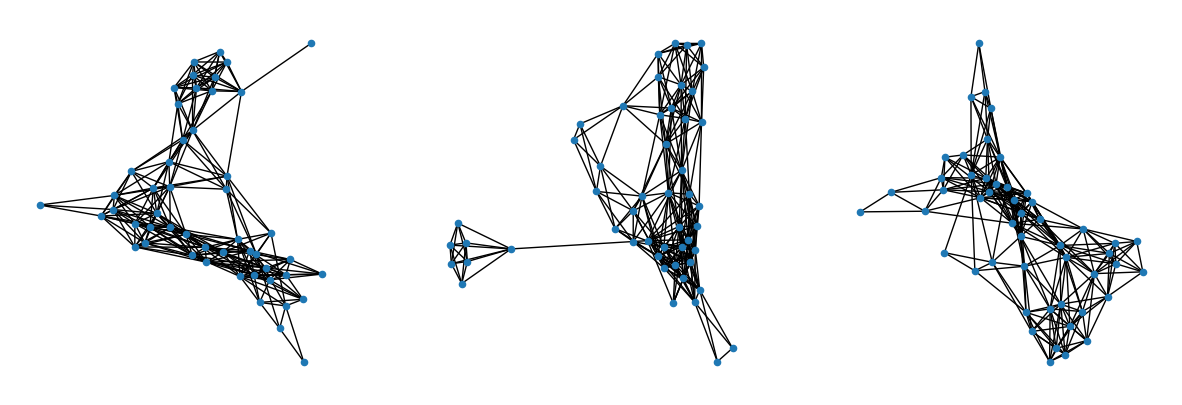

In [15]:
# Create graphs with 50 vertices
G1 = models.model_two(50, 13)
G2 = models.model_two(50, 47)
G3 = models.model_two(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: None are planar but all are connected. Althought it seems like there are too many edges, but I'm not sure.

# Model Three

In [16]:
new_df = df[["num_vertices", "rand_seed"]].drop_duplicates()

# Check if planar and connected
planar = []
connected = []

for index, row in new_df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_three(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

model_three_df = new_df.assign(planar=planar, connected=connected)

In [17]:
model_three_df

,num_vertices,rand_seed,planar,connected
0,20,13,True,True
1,20,47,True,True
2,20,50,True,True
3,30,13,True,True
4,30,47,True,True
5,30,50,True,True
6,40,13,True,True
7,40,47,True,True
9,40,50,True,True
10,50,13,True,True


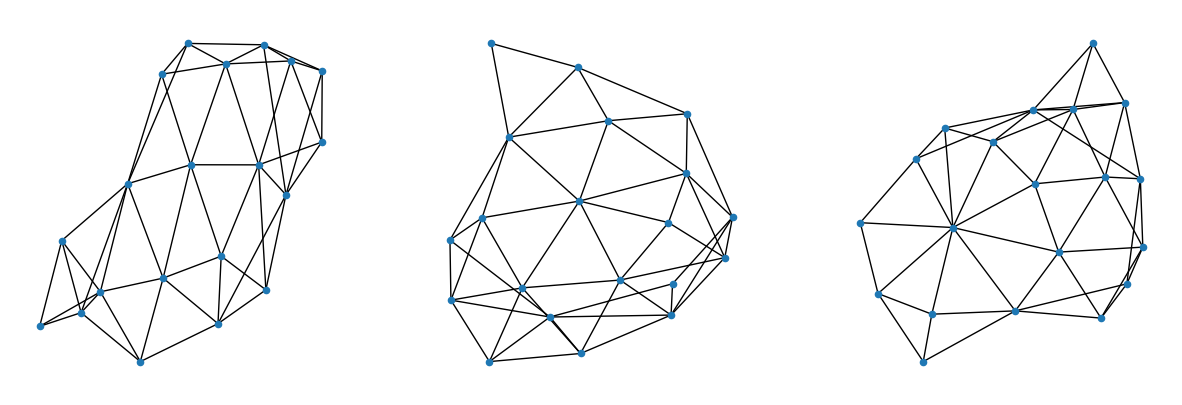

In [18]:
# Create graphs with 20 vertices
G1 = models.model_three(20, 13)
G2 = models.model_three(20, 47)
G3 = models.model_three(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

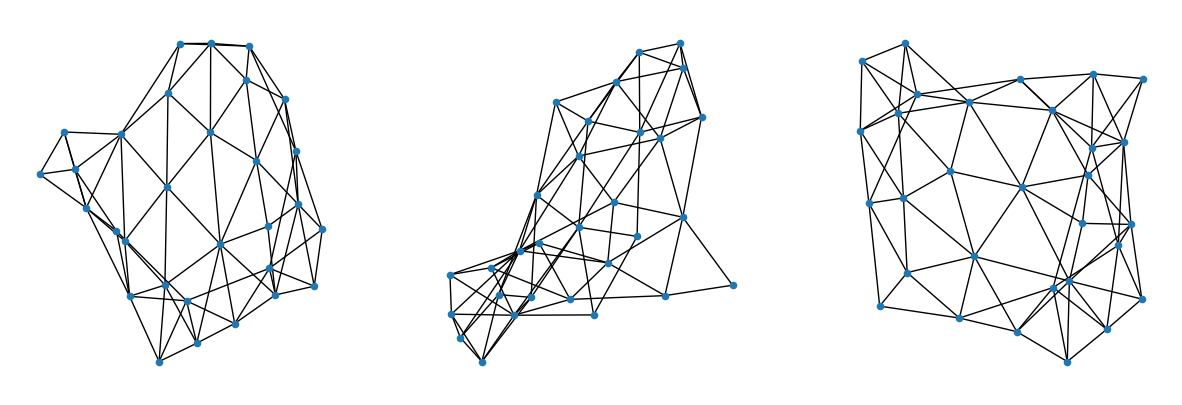

In [19]:
# Create graphs with 30 vertices
G1 = models.model_three(30, 13)
G2 = models.model_three(30, 47)
G3 = models.model_three(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

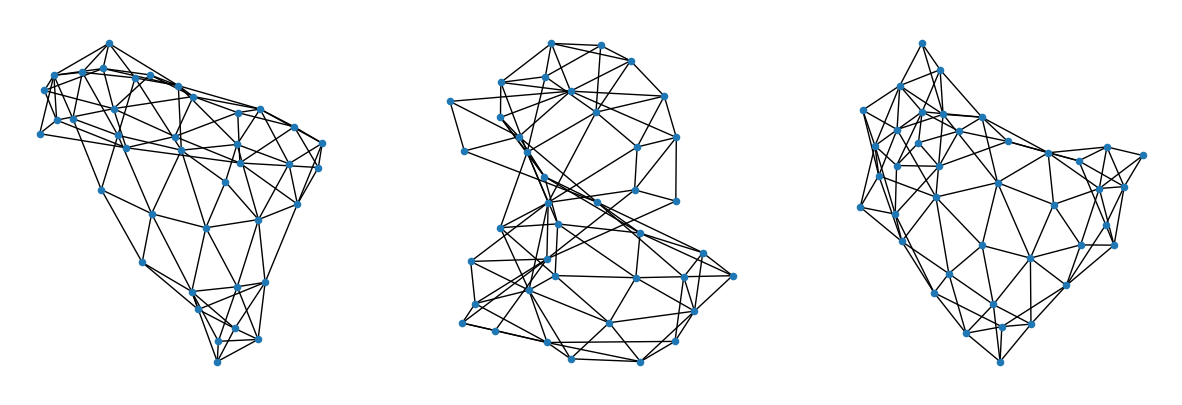

In [20]:
# Create graphs with 40 vertices
G1 = models.model_three(40, 13)
G2 = models.model_three(40, 47)
G3 = models.model_three(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

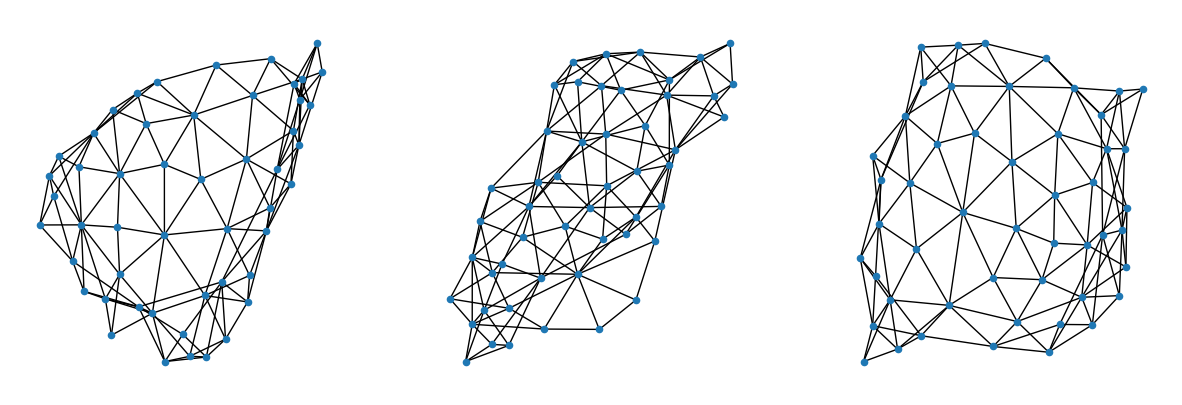

In [21]:
# Create graphs with 50 vertices
G1 = models.model_three(50, 13)
G2 = models.model_three(50, 47)
G3 = models.model_three(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: All are planar and connected.